In [3]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data impact

In [6]:
new = pd.read_excel(r"C:\Users\suvar\Desktop\Linear Regression\Airpollution.xls") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


# Data Type

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    151 non-null    float64       
 1   Pb      151 non-null    float64       
 2   Cd      151 non-null    float64       
 3   Cu      151 non-null    float64       
 4   Cr      151 non-null    float64       
 5   Zn      151 non-null    int64         
 6   NOx     151 non-null    float64       
 7   SO2     151 non-null    float64       
 8   Site    151 non-null    object        
 9   Date    151 non-null    datetime64[ns]
 10  Season  151 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 13.1+ KB


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

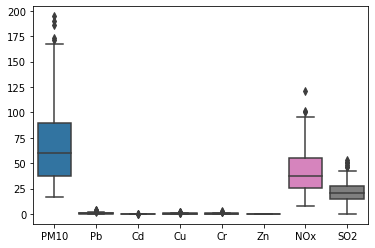

In [5]:
sns.boxplot(data=new)

In [7]:
q1 = new['PM10'].quantile(0.25)
q3 = new['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

169.0425

In [7]:
new['PM10']=np.where(new['PM10'] > upper_limit,upper_limit,new['PM10']) 

<AxesSubplot:>

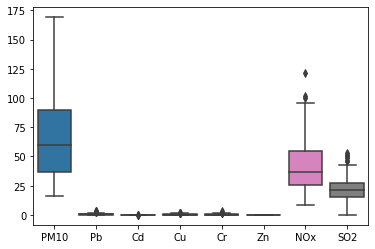

In [8]:
sns.boxplot(data=new)

In [9]:
q1 = new['Pb'].quantile(0.25)
q3 = new['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

In [10]:
new['Pb']=np.where(new['Pb'] > upper_limit,upper_limit,new['Pb']) 

<AxesSubplot:>

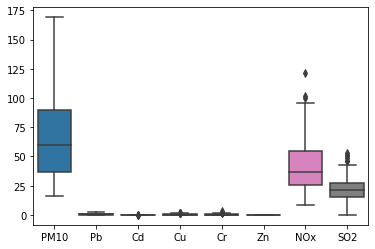

In [11]:
sns.boxplot(data=new)

In [12]:
q1 = new['Cd'].quantile(0.25)
q3 = new['Cd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [8]:
new['Cd']=np.where(new['Cd'] > upper_limit,upper_limit,new['Cd']) 

<AxesSubplot:>

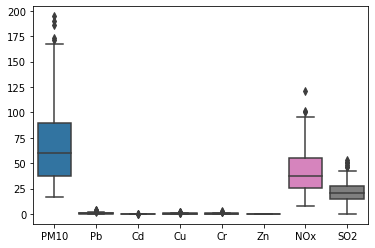

In [9]:
sns.boxplot(data=new)

In [15]:
q1 = new['Cu'].quantile(0.25)
q3 = new['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.2775

<AxesSubplot:>

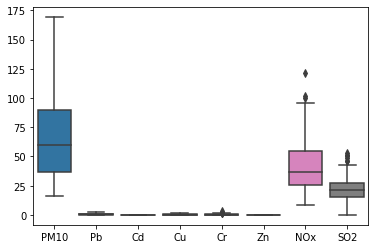

In [16]:
new['Cu']=np.where(new['Cu'] > upper_limit,upper_limit,new['Cu']) 
sns.boxplot(data=new)

In [17]:
q1 = new['Cr'].quantile(0.25)
q3 = new['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.3224999999999998

<AxesSubplot:>

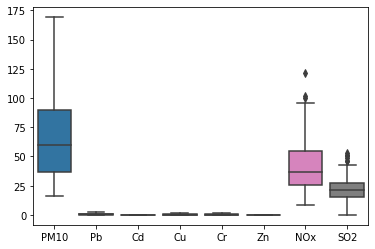

In [18]:
new['Cr']=np.where(new['Cr'] > upper_limit,upper_limit,new['Cr']) 
sns.boxplot(data=new)

In [19]:
q1 = new['Zn'].quantile(0.25)
q3 = new['Zn'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

<AxesSubplot:>

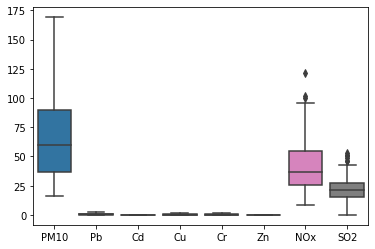

In [20]:
new['Zn']=np.where(new['Zn'] > upper_limit,upper_limit,new['Zn']) 
sns.boxplot(data=new)

In [21]:
q1 = new['NOx'].quantile(0.25)
q3 = new['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

98.13499999999999

<AxesSubplot:>

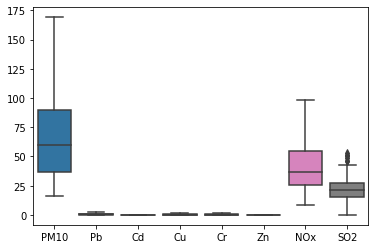

In [22]:
new['NOx']=np.where(new['NOx'] > upper_limit,upper_limit,new['NOx']) 
sns.boxplot(data=new)

In [23]:
q1 = new['SO2'].quantile(0.25)
q3 = new['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

45.80250000000001

<AxesSubplot:>

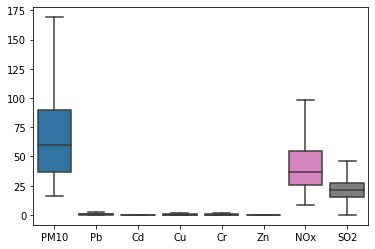

In [24]:
new['SO2']=np.where(new['SO2'] > upper_limit,upper_limit,new['SO2']) 
sns.boxplot(data=new)

# Univariate Analysis

In [25]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.00000,151.000000,151.0,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.06856,0.679983,0.0,0.327053,0.372848,0.0,42.501755,22.226656
std,39.61346,0.560941,0.0,0.395327,0.361985,0.0,22.551657,10.049931
min,16.24000,0.000000,0.0,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.00500,0.220000,0.0,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.61000,0.570000,0.0,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.82000,0.965000,0.0,0.535000,0.580000,0.0,54.695000,27.420000
max,169.04250,2.082500,0.0,1.277500,1.322500,0.0,98.135000,45.802500


In [26]:
new.isna().sum()

PM10      0
Pb        0
Cd        0
Cu        0
Cr        0
Zn        0
NOx       0
SO2       0
Site      0
Date      0
Season    0
dtype: int64

#  Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [27]:
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.0825,0.0,0.53,0.6100,0.0,84.17,40.3700,Mandai,2004-02-07,Summer
1,140.25,2.0825,0.0,0.10,0.9100,0.0,88.81,39.4800,Mandai,2004-02-14,Summer
2,107.01,1.3100,0.0,0.19,0.4800,0.0,81.49,45.8025,Mandai,2004-02-21,Summer
3,88.81,0.7600,0.0,0.33,0.3900,0.0,61.80,27.4200,Mandai,2004-02-28,Summer
4,75.05,0.6000,0.0,0.41,1.3225,0.0,48.71,19.2300,Mandai,2004-03-06,Summer


In [28]:
# Putting feature variable to X
X = new.drop('PM10', axis= 1)

# Putting response variable to y
y = new[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [29]:
df= pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
125,26.19,0.00,0.0,0.16,0.04,0.0,22.14,10.93,SNDT,2004-07-05,Monsoon
48,40.92,0.39,0.0,0.08,0.21,0.0,26.00,13.66,Bhosari,2004-05-05,Summer
149,52.10,0.48,0.0,0.04,0.06,0.0,42.08,22.95,Bhosari,2004-09-22,Monsoon
55,90.48,0.72,0.0,0.00,0.02,0.0,39.16,15.72,Mandai,2004-10-25,Winter
63,141.11,1.39,0.0,0.53,0.71,0.0,80.72,34.31,Mandai,2004-12-20,Winter


# Correlation Matrix


In [30]:
df.corr()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
PM10,1.000000,0.881124,NaN,0.696160,0.841537,NaN,0.551074,0.519019
Pb,0.881124,1.000000,NaN,0.643005,0.771554,NaN,0.649313,0.595104
Cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cu,0.696160,0.643005,NaN,1.000000,0.759803,NaN,0.444826,0.433378
Cr,0.841537,0.771554,NaN,0.759803,1.000000,NaN,0.475384,0.438371
Zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx,0.551074,0.649313,NaN,0.444826,0.475384,NaN,1.000000,0.860182
SO2,0.519019,0.595104,NaN,0.433378,0.438371,NaN,0.860182,1.000000


<AxesSubplot:>

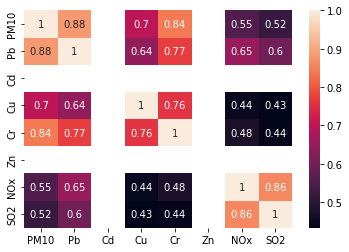

In [31]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'PM10 vs Pb'}, xlabel='Pb', ylabel='PM10'>

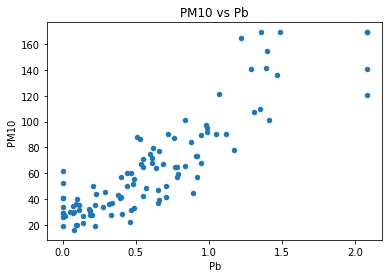

In [32]:
df.plot.scatter(x='Pb', y='PM10', title='PM10 vs Pb')

<AxesSubplot:title={'center':'PM10 vs Cr'}, xlabel='Cr', ylabel='PM10'>

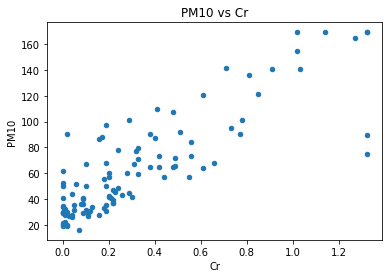

In [33]:
df.plot.scatter(x='Cr', y='PM10', title='PM10 vs Cr')

#### Pb have 88%  strong positve correlation with PM10

* Pb have high impact on PM10
* There is Multiple colinrarity in data 

### Multicolinearity (with the help of VIF)

In [34]:
df=df.drop(['Site','Date','Season'],axis=1)
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
125,26.19,0.0000,0.0,0.16,0.04,0.0,22.14,10.93
48,40.92,0.3900,0.0,0.08,0.21,0.0,26.00,13.66
149,52.10,0.4800,0.0,0.04,0.06,0.0,42.08,22.95
55,90.48,0.7200,0.0,0.00,0.02,0.0,39.16,15.72
63,141.11,1.3900,0.0,0.53,0.71,0.0,80.72,34.31
...,...,...,...,...,...,...,...,...
56,97.09,0.9800,0.0,0.02,0.19,0.0,49.19,29.14
47,43.29,0.3800,0.0,0.09,0.26,0.0,24.96,19.39
10,50.04,0.7100,0.0,0.08,0.19,0.0,39.96,17.58
126,19.22,0.0000,0.0,0.09,0.00,0.0,30.99,24.37


In [35]:
X1=df.drop(['PM10'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

C:\Users\suvar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pb      8.256261
Cd           NaN
Cu      3.752367
Cr      6.591469
Zn           NaN
NOx    21.747451
SO2    19.438557
dtype: float64

# Model Building

*  H0 :- There is no Linear relationship between PM10 and PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site 

* Vs 

*  H1 :- There is Linear relationship between PM10 and PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site 

    Alpha = 0.05 (5%)

In [36]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb+Cd+Cu+Cr+Zn+NOx+SO2',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     106.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.21e-38
Time:                        12:39:20   Log-Likelihood:                -435.59
No. Observations:                 105   AIC:                             883.2
Df Residuals:                      99   BIC:                             899.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7742      3.884      5.864      0.000      15.068      30.480
Pb            44.6508      5.622      7.942      0.000      33.495      55.806
Cd          3.099e-14   4.92e-15      6.295      0.000    2.12e-14    4.08e-14
Cu             6.5656      7.028      0.934      0.352      -7.379      20.510
Cr            40.0426      8.319      4.813      0.000      23.536      56.550
Zn          -2.06e-15   1.82e-15     -1.133      0.260   -5.67e-15    1.55e-15
NOx           -0.1088      0.162     -0.670      0.504      -0.431       0.213
SO2            0.1625      0.324      0.502      0.617      -0.480       0.805
==============================================================================
Omnibus:                        3.360   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.082
Skew:                           0.420   Prob(JB):                        0.214
Kurtosis:                       3.008   Cond. No.                     1.06e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* There is Linear relationship between PM10 and Pb , Cd,Cr
* There is no Linear relationship between PM10 and Pb , Cd,Cr 
 * so we will remove and re-run the model 
* 84% is accuracy of model , so we say model is good fit 

# Multicolinearity(with the help of VIF)

In [37]:
X1=df.loc[:,['Pb', 'Cd','Cr']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

C:\Users\suvar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pb    4.650496
Cd         NaN
Cr    4.650496
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [38]:
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
125,26.19,0.00,0.0,0.16,0.04,0.0,22.14,10.93
48,40.92,0.39,0.0,0.08,0.21,0.0,26.00,13.66
149,52.10,0.48,0.0,0.04,0.06,0.0,42.08,22.95
55,90.48,0.72,0.0,0.00,0.02,0.0,39.16,15.72
63,141.11,1.39,0.0,0.53,0.71,0.0,80.72,34.31


In [39]:
Y = 22.4490 + 44.223 *0.39 + 0 *0.0+44.4242*0.21 
Y

49.025052

In [40]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,fitted_value,residual
125,26.19,0.00,0.0,0.16,0.04,0.0,22.14,10.93,24.794582,1.395418
48,40.92,0.39,0.0,0.08,0.21,0.0,26.00,13.66,48.514232,-7.594232
149,52.10,0.48,0.0,0.04,0.06,0.0,42.08,22.95,46.024600,6.075400
55,90.48,0.72,0.0,0.00,0.02,0.0,39.16,15.72,54.018949,36.461051
63,141.11,1.39,0.0,0.53,0.71,0.0,80.72,34.31,113.544918,27.565082


# Linearity

<AxesSubplot:title={'center':'PM10 vs Pb '}, xlabel='Pb', ylabel='PM10'>

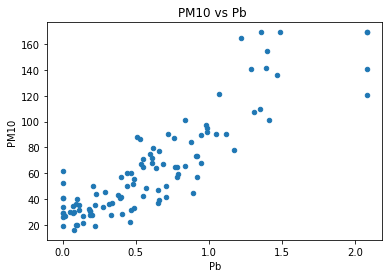

In [41]:
df.plot.scatter(x='Pb', y='PM10', title='PM10 vs Pb ')

# Homoscedasicity


<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

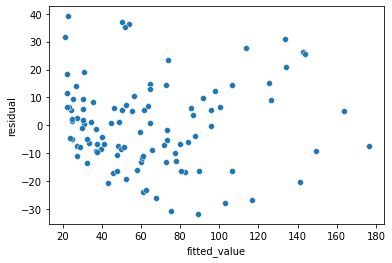

In [42]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

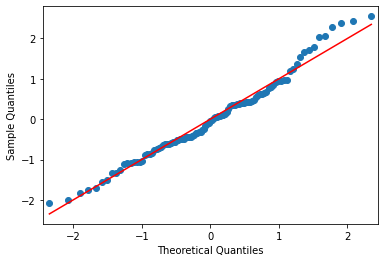

In [43]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

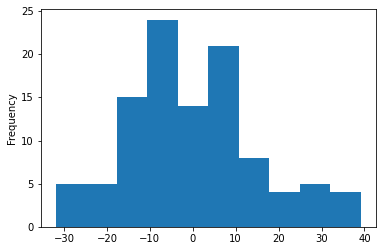

In [44]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)


In [45]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season,PM10
62,1.42,0.0,0.11,0.92,0.0,95.74,45.8025,Mandai,2004-12-13,Winter,153.89
143,0.00,0.0,0.00,0.00,0.0,30.52,24.5100,Bhosari,2004-08-04,Monsoon,37.08
86,1.86,0.0,0.97,0.79,0.0,78.57,28.7700,SNDT,2004-01-26,Winter,99.98
80,0.81,0.0,0.83,0.54,0.0,39.49,14.8700,SNDT,2004-12-15,Winter,81.15
100,0.98,0.0,0.97,0.94,0.0,33.19,19.1500,Bhosari,2004-01-07,Winter,101.86


In [46]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season,PM10,Prediction
62,1.42,0.0,0.11,0.92,0.0,95.74,45.8025,Mandai,2004-12-13,Winter,153.89,120.769931
143,0.00,0.0,0.00,0.00,0.0,30.52,24.5100,Bhosari,2004-08-04,Monsoon,37.08,23.438070
86,1.86,0.0,0.97,0.79,0.0,78.57,28.7700,SNDT,2004-01-26,Winter,99.98,139.956504
80,0.81,0.0,0.83,0.54,0.0,39.49,14.8700,SNDT,2004-12-15,Winter,81.15,84.135111
100,0.98,0.0,0.97,0.94,0.0,33.19,19.1500,Bhosari,2004-01-07,Winter,101.86,110.042951


In [48]:
Y=22.4490+44.2223*1.42+44.4242*0.92
Y

126.11492999999999

# Test

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PM10, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.73


In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(df.PM10, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84


* Model is good fit & Performance on Test data is also good fit 